In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn.datasets import fetch_california_housing

# دیتاست کالیفرنیا رو لود می‌کنیم
california = fetch_california_housing()

# ویژگی‌ها (X) و هدف (y) درست مثل Boston
x = california.data
y = california.target

# ساخت دیتافریم
df = pd.DataFrame(x, columns=california.feature_names)

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [7]:
df ['Price'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## تقسیم داده‌ها

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
xtrain.shape

(14448, 8)

In [10]:
xtest.shape

(6192, 8)

In [11]:
ytrain.shape

(14448,)

In [12]:
ytest.shape

(6192,)

### مدل رگرسیون خطی

In [13]:
model = LinearRegression()

In [14]:
model.fit(xtrain , ytrain)

LinearRegression()

###  پیش‌بینی

In [15]:
ypred = model.predict(xtest)
ypred.shape

(6192,)

## رسم نمودار

Text(0, 0.5, 'predicted prices')

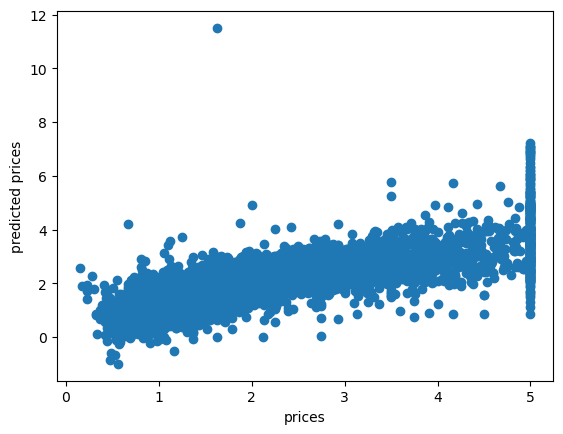

In [16]:
plt.scatter(ytest,ypred)
plt.plot()
plt.xlabel('prices')
plt.ylabel('predicted prices')

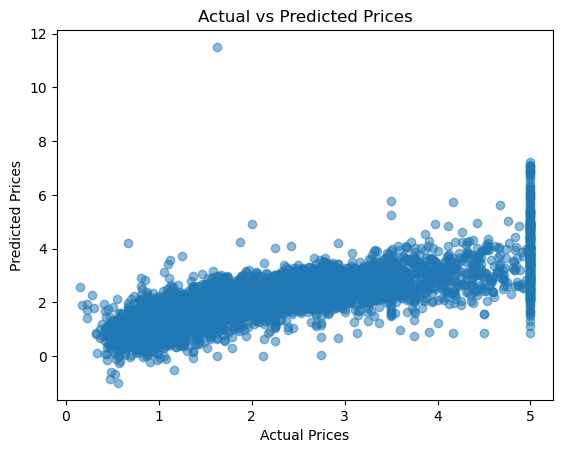

In [21]:
plt.scatter(ytest, ypred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# معیارهای ارزیابی مدل‌های رگرسیون

### . محاسبه خطای میانگین مربعات
### MSE → برای بررسی خطاهای بزرگ حساس‌تره

### MAE → خطای متوسط به زبان ساده و قابل تفسیر

### R² → کیفیت کلی مدل در توضیح داده‌ها

In [24]:

mse = met.mean_squared_error(ytest, ypred)
mae = met.mean_absolute_error(ytest, ypred)
r2  = met.r2_score(ytest, ypred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.5305677824766759
Mean Absolute Error (MAE): 0.5272474538306182
R² Score: 0.5957702326061659


## تحلیل معیارها
### 🔹 1. MSE = 0.53

این عدد یعنی میانگین مربعات خطا تقریباً ۰.۵۳ است.

چون خروجی دیتاست California Housing قیمت خانه‌ها (به هزار دلار) است، یعنی مدل به طور میانگین حدود √0.53 ≈ 0.73 هزار دلار (۷۳۰ دلار) خطای ریشه مربعی دارد.

### 🔹 2. MAE = 0.53

این معیار قابل‌تفسیرتر است.

یعنی مدل در پیش‌بینی قیمت خانه‌ها به طور متوسط ۰.۵۳ هزار دلار (۵۳۰ دلار) خطا دارد.

چون MAE و ریشه‌ی MSE نزدیک به هم هستند ⇒ خطاها یکنواخت بوده و پرش خیلی شدیدی در داده‌ها وجود ندارد.

### 🔹 3. R² = 0.596 (~60%)

این یعنی حدود ۶۰٪ از تغییرات قیمت خانه‌ها توسط مدل رگرسیون خطی توضیح داده می‌شود.

عدد متوسطی است:
## اگر نزدیک 1 بود ⇒ مدل خیلی خوب.
## اگر نزدیک 0 بود ⇒ مدل بی‌فایده.
## اینجا ~0.6 است ⇒ مدل بد نیست ولی خیلی هم قوی نیست.